In [2]:
from getpass import getpass

admin_rdm_url = 'https://admin.bh.rdm.yzwlab.com/' #'https://admin.staging.rdm.example.com/'
rdm_url = 'https://bh.rdm.yzwlab.com/'
idp_name_1 = None # 'GakuNin RDM IdP'
idp_username_1 = None
idp_password_1 = None
default_result_path = None
close_on_fail = False
transition_timeout = 30000

announcement_title = 'サンプルタイトル'
announcement_body = 'サンプル本文'

In [3]:
if idp_username_1 is None:
    idp_username_1 = input(prompt=f'Username for {idp_name_1}')
if idp_password_1 is None:
    idp_password_1 = getpass(prompt=f'Password for {idp_username_1}@{idp_name_1}')
(len(idp_username_1), len(idp_password_1))

# 定期監視-管理者-アナウンス

- サブシステム名: 管理者
- ページ/アドオン: 管理者
- 機能分類: ログイン
- シナリオ名: ログイン確認
- 用意するテストデータ: URL一覧、アカウント(管理者ユーザー1: GRDM)

## GakuNin RDM管理者ページのURLを開く

①ブラウザを開き、画面右上の設定メニューから「シークレットモードで開く」を選択する。  
②新規画面が開かれ、画面上において、「シークレットモードです」と表示されていることを確認する。
以下、シークレットモードにて確認を行う。

③ブラウザを開き、下記URLにアクセスする。  
https://rdm.example.com/  

In [4]:
import tempfile

work_dir = tempfile.mkdtemp()
if default_result_path is None:
    default_result_path = work_dir
work_dir

'/tmp/tmp1klimkfp'

In [10]:
import importlib
import pandas as pd

import scripts.playwright
importlib.reload(scripts.playwright)

from scripts.playwright import *
from scripts import grdm

await init_pw_context(close_on_fail=close_on_fail, last_path=default_result_path)

('20250421-024213', '/tmp/tmpuz0o1wjk')

Start epoch: 1745203333.345571 seconds


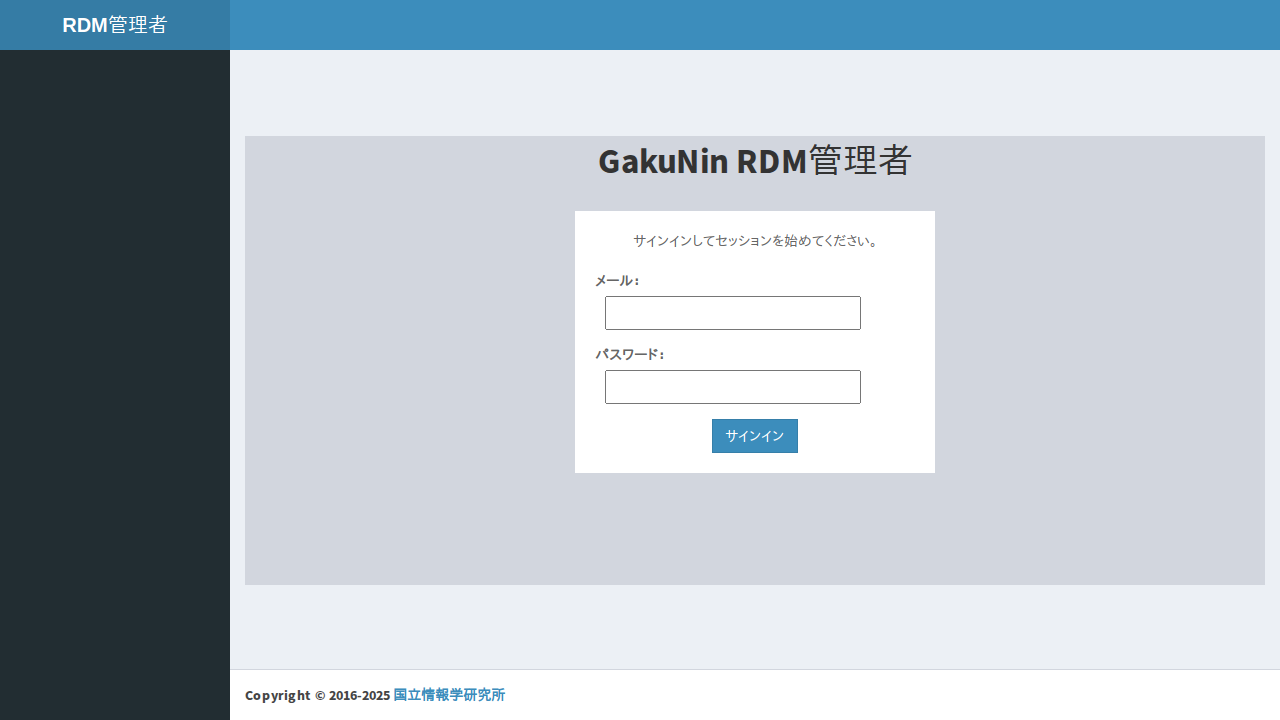

In [11]:
import time

async def _step(page):
    await page.goto(admin_rdm_url)

    await expect(page.locator('.login-logo')).to_be_visible(timeout=30000)

await run_pw(_step)

## ログイン情報を用いてGakuNin RDMにログインする

(IdPに関するログイン情報が与えられた場合、)
GakuNin Embeded DSのプルダウンを展開し、IdPリストから指定されたIdPを選択する。その後、アカウントのID/Passwordを入力して「Login」ボタンを押下する。

(IdPが指定されていない場合、)
CASのログイン操作を実施する。

Start epoch: 1745203334.8832119 seconds


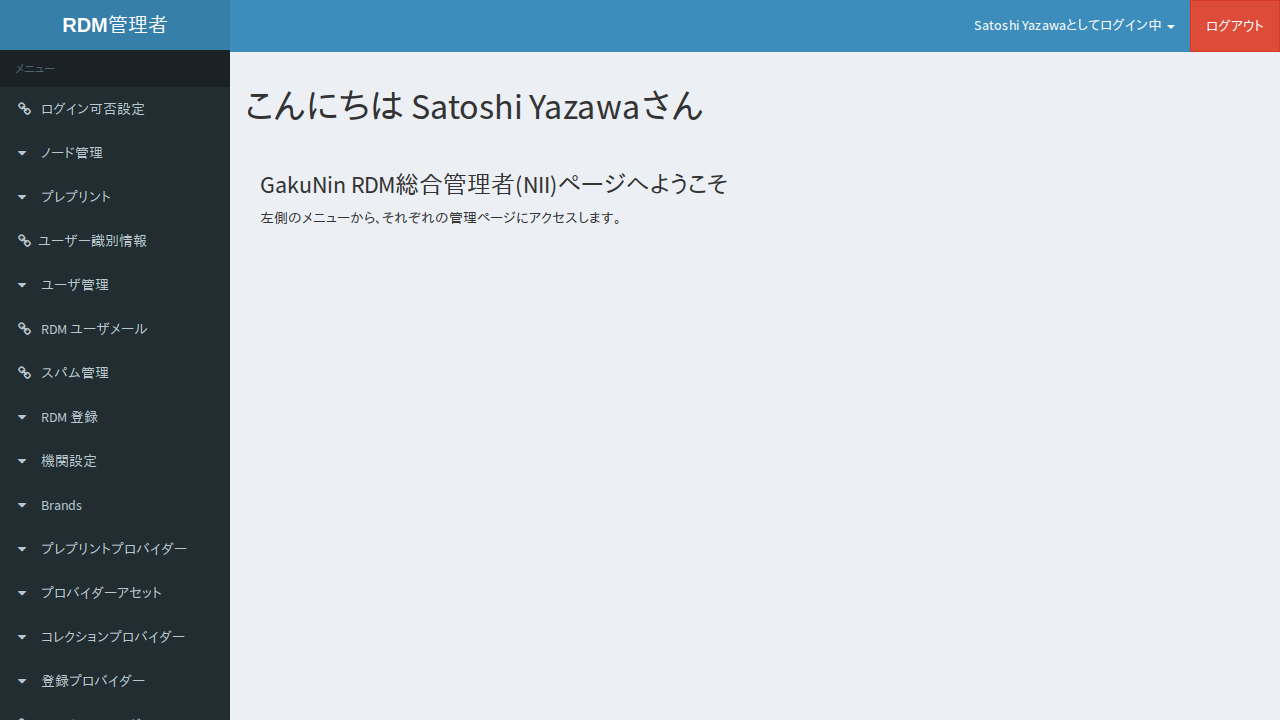

In [12]:
import scripts.grdm
importlib.reload(scripts.grdm)

async def _step(page):
    await scripts.grdm.login_as_admin(
        page, idp_name_1, idp_username_1, idp_password_1, transition_timeout=transition_timeout
    )

    await expect(page.locator('//*[contains(@class, "btn-danger") and contains(text(), "ログアウト")]')).to_be_enabled(timeout=transition_timeout)

await run_pw(_step)

## 「アナウンス」を選択する

「アナウンス」が表示される

Start epoch: 1745203335.8636825 seconds


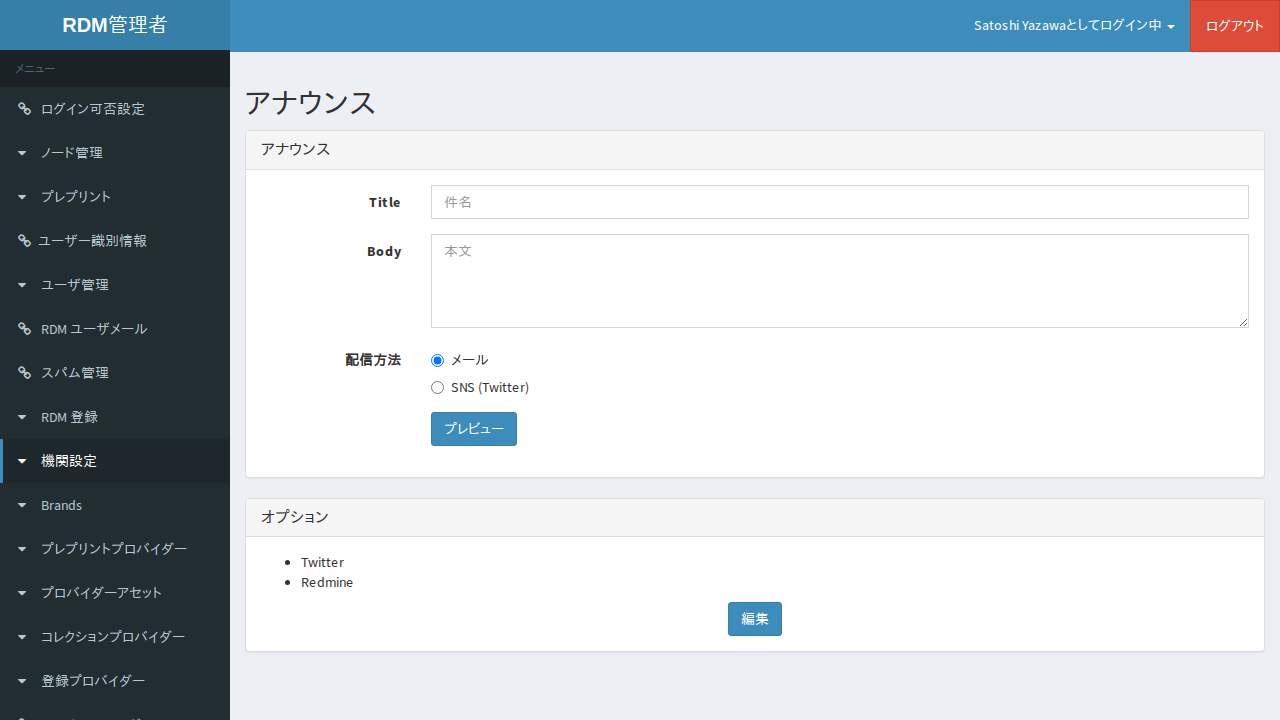

In [13]:
async def _step(page):
    await page.locator('//a[@href = "/announcement/"]').click()

    await expect(page.locator('//h2[text() = "アナウンス"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「アナウンス」のアナウンスフォームにて設定値を入力し、「メールプレビュー」ボタンを押下する

「メールプレビュー」が表示される

Start epoch: 1745203336.293649 seconds


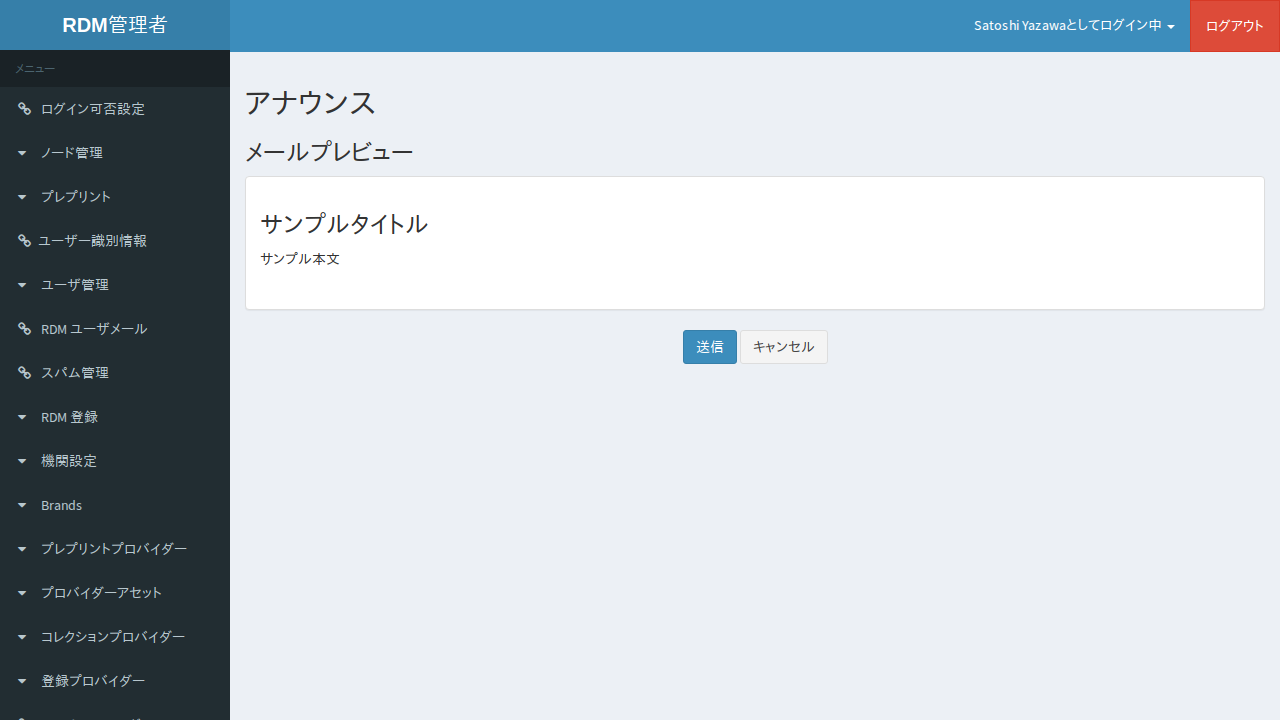

In [14]:
async def _step(page):
    await page.locator('#id_title').fill(announcement_title)
    await page.locator('#id_body').fill(announcement_body)
    await page.locator('//button[@type = "submit"]').click()

    await expect(page.locator(f'//h3[contains(text(), "{announcement_title}")]')).to_be_visible(timeout=transition_timeout)
    await expect(page.locator(f'//p[contains(text(), "{announcement_body}")]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「キャンセル」ボタンを押下する

「アナウンス」に戻る

Start epoch: 1745203411.8130734 seconds


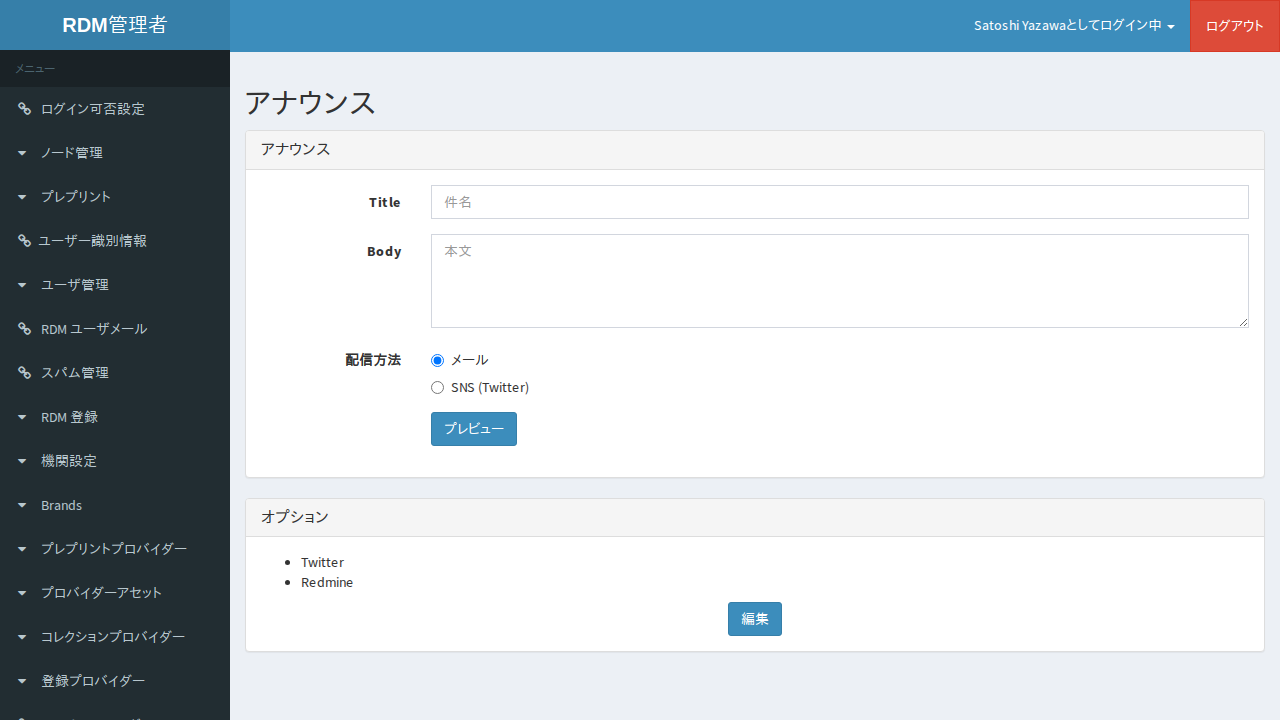

In [15]:
async def _step(page):
    await page.locator('//a[text() = "キャンセル"]').click()

    await expect(page.locator('//h2[text() = "アナウンス"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「アナウンス」のオプションフォームにて「編集」ボタンを押下する

「アナウンス-オプション」が表示される

Start epoch: 1745203484.5117226 seconds


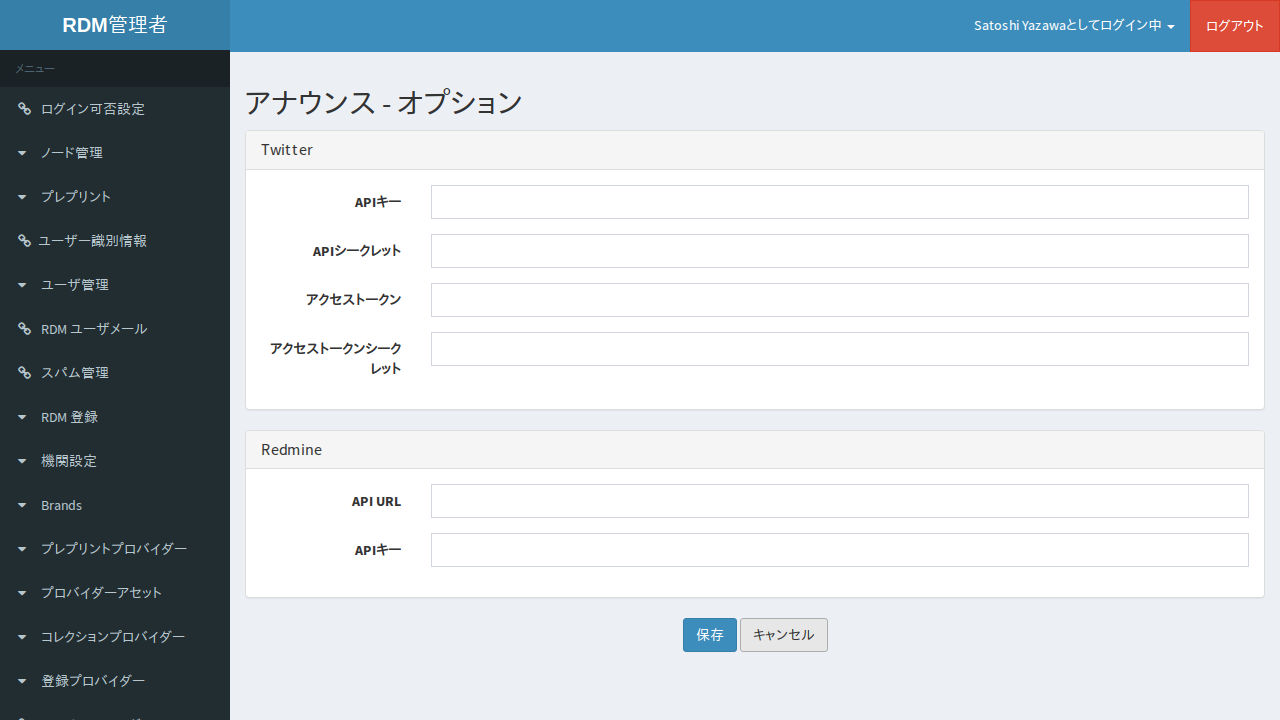

In [16]:
async def _step(page):
    await page.locator('//a[text() = "編集"]').click()

    await expect(page.locator('//h2[text() = "アナウンス - オプション"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

## 「保存」ボタンを押下する

オプションが保存される

Start epoch: 1745203545.5960808 seconds


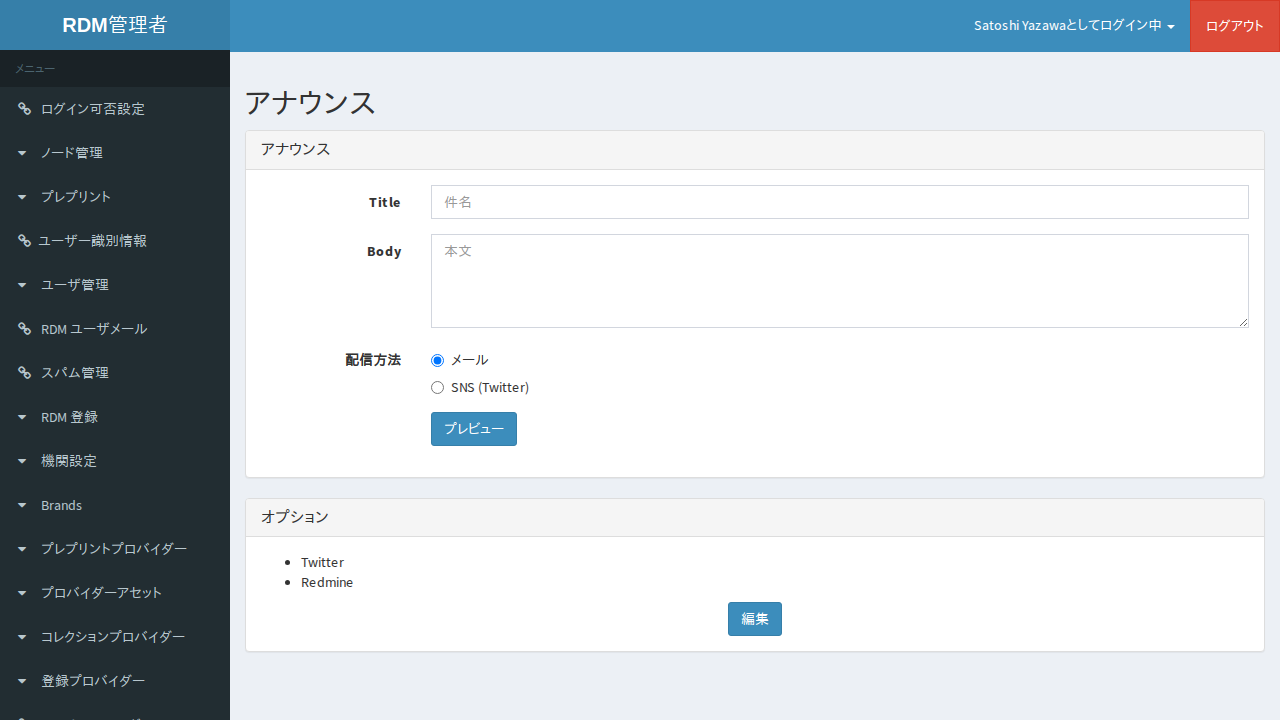

In [17]:
async def _step(page):
    await page.locator('//input[@value = "保存"]').click()

    await expect(page.locator('//h2[text() = "アナウンス"]')).to_be_visible(timeout=transition_timeout)

await run_pw(_step)

終了処理を実施。

In [18]:
await finish_pw_context()

Video: /tmp/tmp1klimkfp/video-1.webm
HAR: /tmp/tmp1klimkfp/har.zip


In [19]:
!rm -fr {work_dir}